# Задача 1
Постройте график\
Назовите график\
Сделайте именование оси x и оси y\
Сделайте выводы

### 1.1. Скачать данные по ссылке https://www.kaggle.com/datasets/ionaskel/laptop-prices

In [1]:
from google.colab import files

uploaded = files.upload()

Saving kc-house-data.csv to kc-house-data.csv


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('kc-house-data.csv', encoding='cp1251', index_col='id')
df.head(1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


### 1.2 Изучите стоимость недвижимости

In [4]:
import matplotlib.pyplot as plt

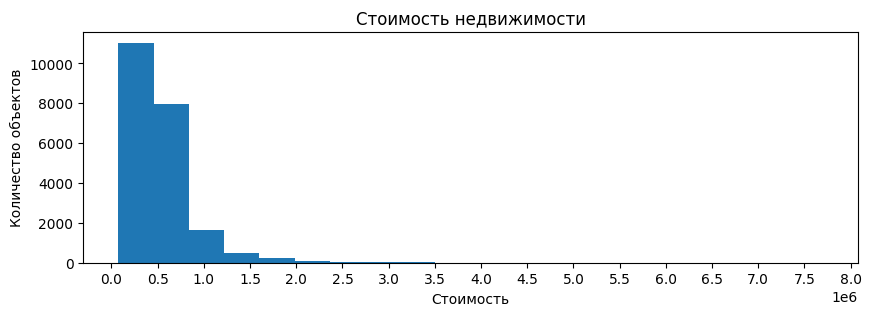

In [13]:
plt.figure(figsize=(10,3))
plt.hist(df['price'], bins=20)
plt.title('Стоимость недвижимости')
plt.xlabel('Стоимость')
plt.locator_params(axis='x', nbins= 20 )
plt.ylabel('Количество объектов');

Большинство объектов недвижимости имеет стоимость от 100 тыс. до 700 тыс у.е.

### 1.3 Изучите распределение квадратуры жилой площади

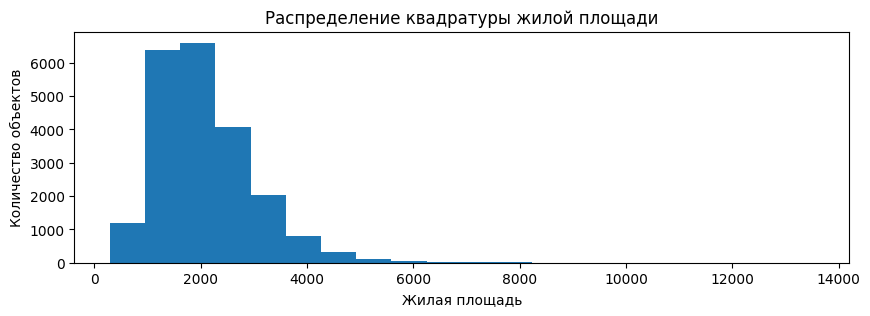

In [15]:
plt.figure(figsize=(10,3))
plt.hist(df['sqft_living'], bins=20)
plt.title('Распределение квадратуры жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество объектов');

Большинство объектов недвижимости имеет жилую площадь от 1000 до 3000.

### 1.4 Изучите распределение года постройки

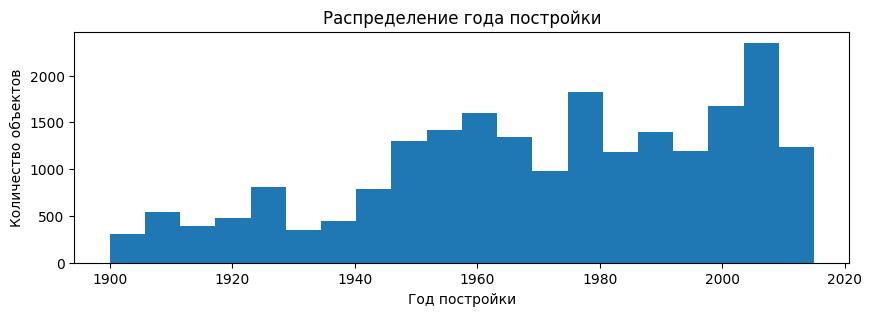

In [16]:
plt.figure(figsize=(10,3))
plt.hist(df['yr_built'], bins=20)
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество объектов');

В базе представлены дома 1900 - 2015 годов постройки. Основой объем домов построен в 1950 - 2015 годах. Пик строительства наблюдается в 2005 - 2010 гг.

# Задача 2

### 2.1 Изучите распределение домов от наличия вида на набережную
Постройте график\
Сделайте выводы

In [22]:
data = df['waterfront'].value_counts()
data.index = ['no', 'yes']
data

no     21450
yes      163
Name: waterfront, dtype: int64

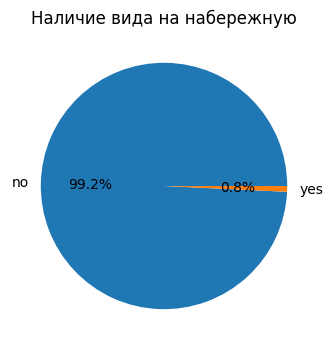

In [24]:
plt.figure(figsize=(6, 4))
plt.pie(data.values, labels=data.index, autopct='%1.1f%%')
plt.title('Наличие вида на набережную');

Вид н набережную имеют менее 1% домов

### 2.2 Изучите распределение этажей домов

In [35]:
data = df['floors'].value_counts()

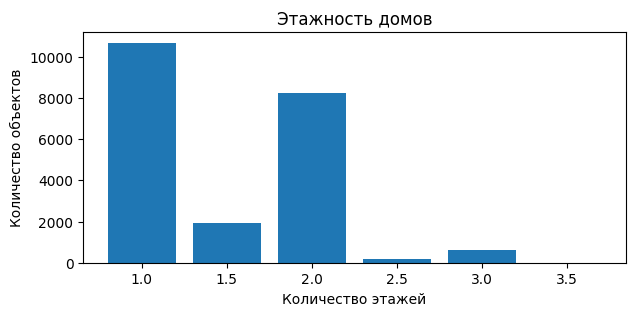

In [40]:
plt.figure(figsize=(7,3))
plt.bar(data.index, data.values, width=0.4)
plt.title('Этажность домов')
plt.xlabel('Количество этажей')
plt.ylabel('Количество объектов');

Преобладают одноэтажные и двухэтажные дома

### 2.2 Изучите распределение состояния домов

In [41]:
data = df['condition'].value_counts()

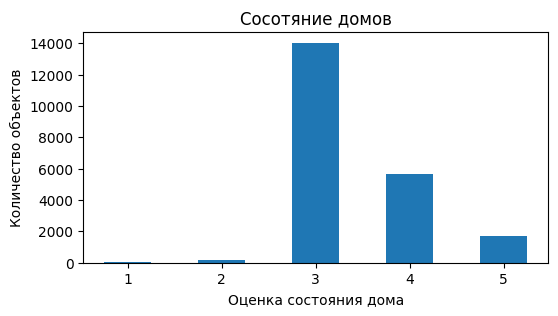

In [44]:
plt.figure(figsize=(6,3))
plt.bar(data.index, data.values, width=0.5)
plt.title('Сосотяние домов')
plt.xlabel('Оценка состояния дома')
plt.ylabel('Количество объектов');

Более половины всех домов оценеиваются на "3", около 20% - на "4", около 5% - на "5". Домов с оценками "1" и "2" практически не встречается.

# Задача 3
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.


Построим матрицу корреляций для определения параметров, оказывающих наибольшее влияние на цену

In [50]:
import seaborn as sns
import numpy as np

In [56]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.2] = 0
corr_matrix

<ipython-input-56-002a676d2c67>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.3,1.0,0.5,0.6,0.0,0.2,0.0,0.0,0.0,0.4,0.5,0.3,0.2,0.0,-0.2,0.0,0.0,0.4,0.0
bathrooms,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.2,0.0,0.7,0.7,0.3,0.5,0.0,-0.2,0.0,0.2,0.6,0.0
sqft_living,0.7,0.6,0.8,1.0,0.2,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,-0.2,0.0,0.2,0.8,0.2
sqft_lot,0.0,0.0,0.0,0.2,1.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.7
floors,0.3,0.2,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,-0.2,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.4,0.0,0.2,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.2,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,-0.2,0.2,-0.4,0.0,0.0,0.0,0.0,0.0,0.0
grade,0.7,0.4,0.7,0.8,0.0,0.5,0.0,0.3,0.0,1.0,0.8,0.2,0.4,0.0,-0.2,0.0,0.2,0.7,0.0


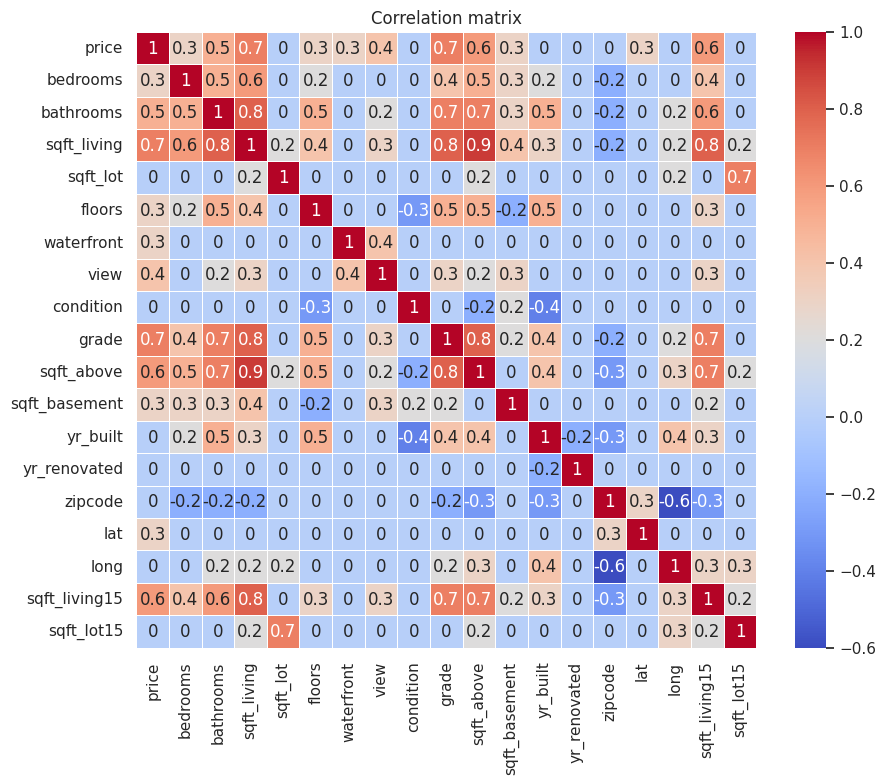

In [57]:
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.0)
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Correlation matrix');

Матрица корреляций показывает, что на цену наибоьшим образом влияют следующие параметры:
1. жилая площадь
2. оценка дома
3. количество ванных комнат
4. вид
5. количество спален


Проверим каждый из указанных показателей с помощью графиков:

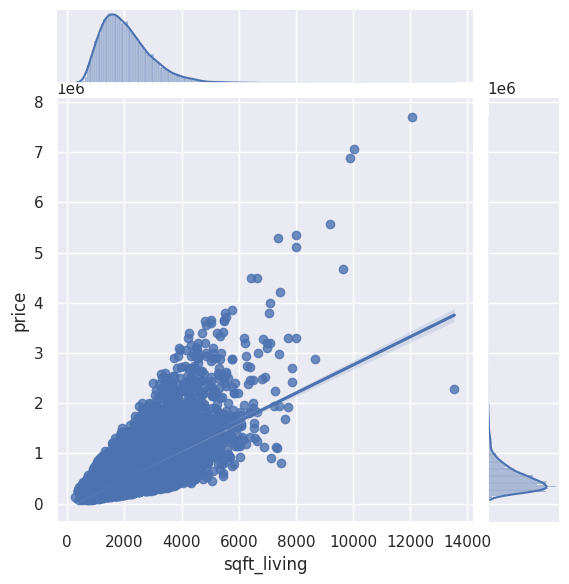

In [61]:
sns.jointplot(x=df['sqft_living'], y=df['price'], kind='reg');

Видна явная прямая зависимость соимости недвижимости от жилой площади

<Axes: xlabel='grade', ylabel='price'>

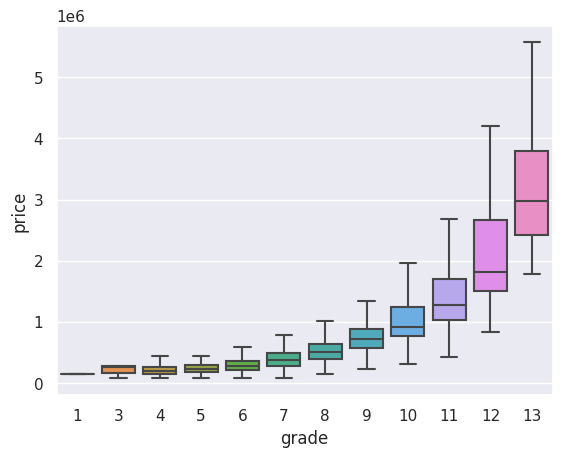

In [64]:
sns.boxplot(x=df['grade'], y=df['price'], whis=1.5, showfliers=False)

Наблюдаем прямую зависимость стоимости от оценки дома

<Axes: xlabel='bathrooms', ylabel='price'>

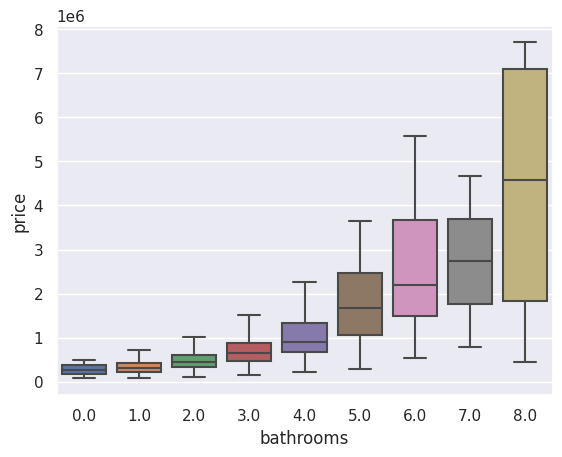

In [80]:
sns.boxplot(x=df['bathrooms'].round(0), y=df['price'], whis=1.5, showfliers=False)

Наблюдаем прямую зависимость стоимости от количества ванных комнат

<Axes: xlabel='view', ylabel='price'>

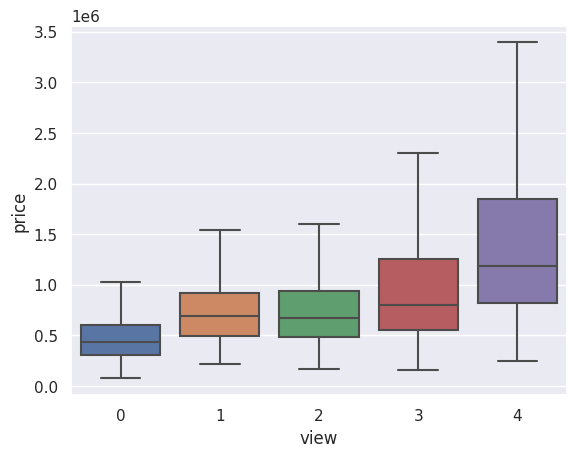

In [79]:
sns.boxplot(x=df['view'], y=df['price'], whis=1.5, showfliers=False)

Подтверждаем прямую зависимость стоимости от количества ванных комнат

<Axes: xlabel='bedrooms', ylabel='price'>

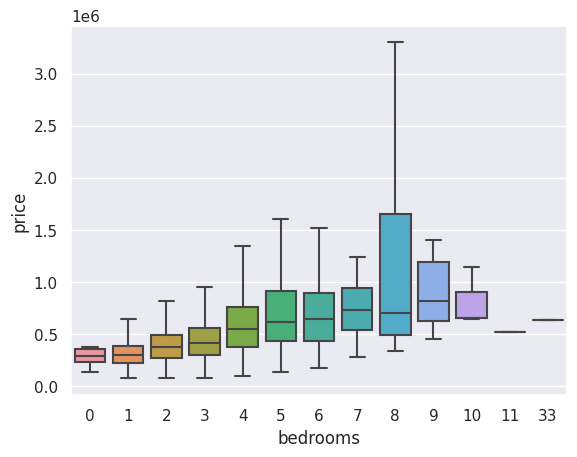

In [81]:
sns.boxplot(x=df['bedrooms'].round(0), y=df['price'], whis=1.5, showfliers=False)

Видим прямую зависимость стоимости от количества спален